# Imports

In [1]:
import itertools
import numpy as np
import os
import pandas as pd
import plotnine as gg
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import AnovaRM
from scipy.stats import spearmanr, ttest_1samp, f
gg.theme_set(gg.theme_classic)

In [2]:
from Functions import get_ages_cols, get_param_names, get_category_dict

## Directories etc.

In [3]:
data_save_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data"
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

# Get data

In [4]:
ages_cols = get_ages_cols()
param_names = get_param_names()
category_dict = get_category_dict()

In [5]:
all_data = pd.read_csv(os.path.join(data_save_path, 'all_data.csv'), index_col=0)
all_data_z = pd.read_csv(os.path.join(data_save_path, 'all_data_z.csv'), index_col=0)
all_data_long = pd.read_csv(os.path.join(data_save_path, 'all_data_long.csv'), index_col=0)
all_data_long_z = pd.read_csv(os.path.join(data_save_path, 'all_data_long_z.csv'), index_col=0)

# Results

## Ranges

In [6]:
# [c for c in all_data.columns if 'rl' in c]

In [7]:
col_name = "bf_forget"
print(np.mean((all_data[col_name])))
print(np.std((all_data[col_name])))
print(np.min((all_data[col_name])))
print(np.max((all_data[col_name])))

0.05601170961133604
0.028342603664456838
0.015113441000000003
0.143155068


In [8]:
ttest_1samp(all_data["bf_forget"] - all_data['rl_forget'], 0)

Ttest_1sampResult(statistic=-12.704193990137856, pvalue=9.064590296231456e-29)

In [9]:
len(all_data["bf_forget"] - all_data['rl_forget'])

247

## Plot features over age

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 15 x 15 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_FeaturesOverAge.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


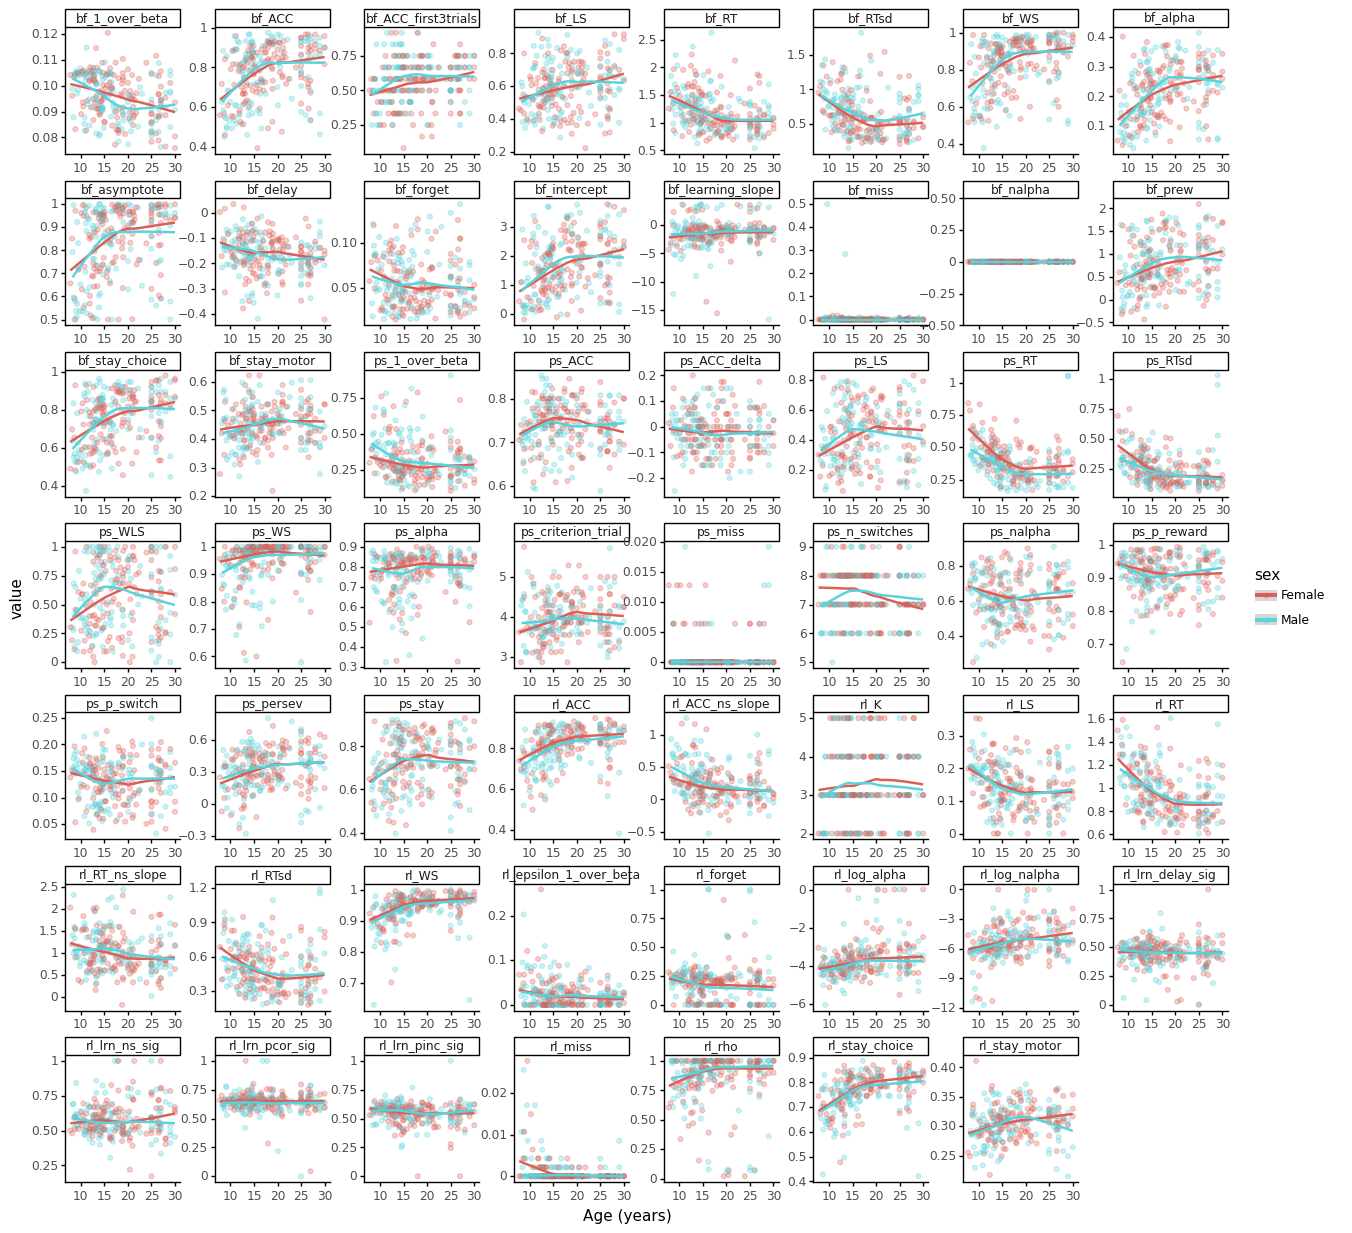

<ggplot: (112810868116)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 15 x 15 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_FeaturesOverAgeGroup.png


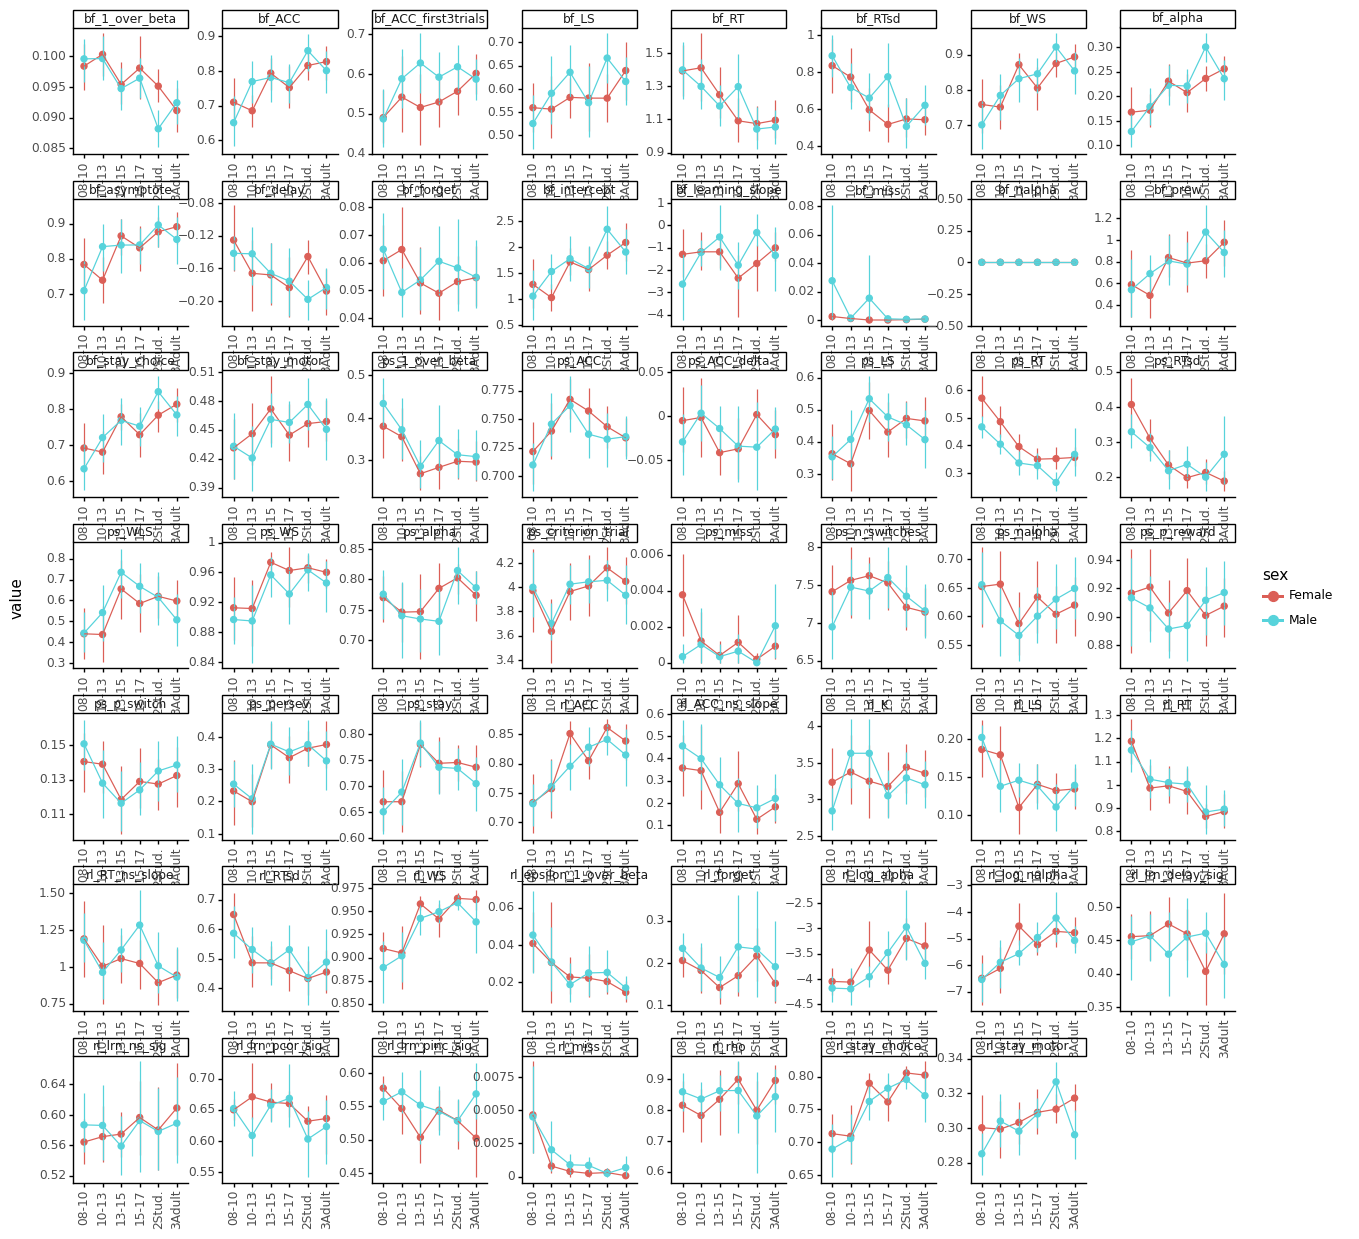

<ggplot: (112805861102)>


In [10]:
gg.options.figure_size = (15, 15)
g_age = (gg.ggplot(all_data_long, gg.aes('PreciseYrs', 'value', color='sex'))
     + gg.geom_point(alpha=0.3)
     + gg.geom_smooth()
     + gg.labs(x='Age (years)')
     + gg.theme(subplots_adjust={'hspace': 0.35, 'wspace': 0.3})
     + gg.facet_wrap('~ feature', scales='free')
    )
g_age.save(os.path.join(plot_save_path, '1_FeaturesOverAge.png'))
print(g_age)

g_agegroup = (gg.ggplot(all_data_long, gg.aes('factor(age_group_)', 'value', color='sex', group='sex'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.labs(x='')
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.theme(subplots_adjust={'hspace': 0.35, 'wspace': 0.3})
     + gg.facet_wrap('~ feature', scales='free')
    )
g_agegroup.save(os.path.join(plot_save_path, '1_FeaturesOverAgeGroup.png'))
print(g_agegroup)

In [11]:
# Alphas
all_data_long.loc[all_data_long['feature'] == 'rl_log_alpha', 'value'] = np.exp(
    all_data_long.loc[all_data_long['feature'] == 'rl_log_alpha', 'value'])
all_data_long.loc[all_data_long['feature'] == 'rl_log_nalpha', 'value'] = np.exp(
    all_data_long.loc[all_data_long['feature'] == 'rl_log_nalpha', 'value'])

# Betas
# all_data_long.loc[all_data_long['feature'].isin(['rl_epsilon_1_over_beta', 'ps_1_over_beta', 'bf_1_over_beta']), 'value'] = 1 / \
#     all_data_long.loc[all_data_long['feature'].isin(['rl_epsilon_1_over_beta', 'ps_1_over_beta', 'bf_1_over_beta']), 'value']
# all_data_long.loc[all_data_long['feature'] == 'rl_epsilon_1_over_beta', 'value'] /= np.mean(
#     all_data_long.loc[all_data_long['feature'] == 'rl_epsilon_1_over_beta', 'value'])
all_data_long

,ID,PreciseYrs,BMI,meanT,PDS,sex,age_group_,PDS_group_,T_group_,feature,value,category,task,param
0,17,8.657084,18.200751,NaN,2.50,Female,08-10,2_mid,NaN,bf_ACC,0.566670,ACC,bf,ACC
1,18,12.637919,16.157863,NaN,2.25,Female,10-13,1_early,NaN,bf_ACC,0.800000,ACC,bf,ACC
2,20,14.543463,17.433768,120.649667,2.80,Male,13-15,3_late,3_100%,bf_ACC,0.850000,ACC,bf,ACC
3,22,16.490075,22.709959,147.334443,3.00,Male,15-17,3_late,3_100%,bf_ACC,0.733330,ACC,bf,ACC
4,23,11.206023,15.147686,27.712900,1.00,Male,10-13,0_pre,1_50%,bf_ACC,0.816670,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13580,465,22.333333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,bf_delay,-0.135437,Delay,bf,delay
13581,466,20.083333,NaN,NaN,NaN,Male,2Stud.,4_Stud.,4_Stud.,bf_delay,-0.238006,Delay,bf,delay
13582,467,18.750000,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,bf_delay,-0.118256,Delay,bf,delay
13583,468,21.833333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,bf_delay,-0.110450,Delay,bf,delay


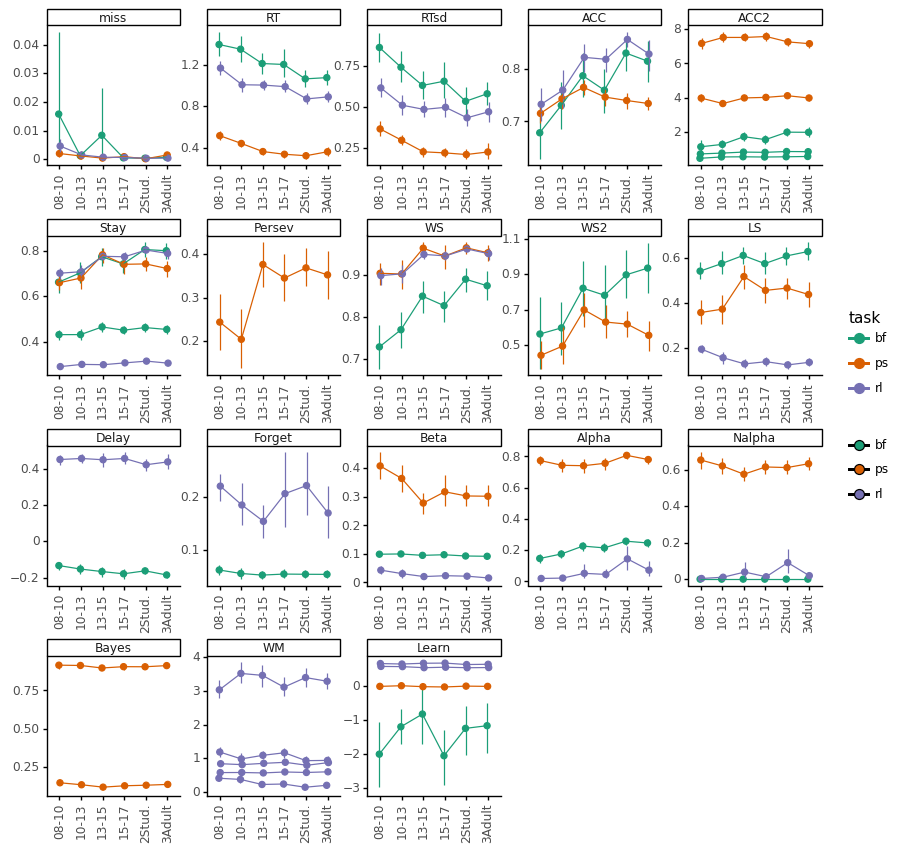

<ggplot: (112816289913)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_GroupedFeaturesOverAge.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_GroupedFeaturesOverAge.svg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_GroupedFeaturesOverAgeGroup.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothe

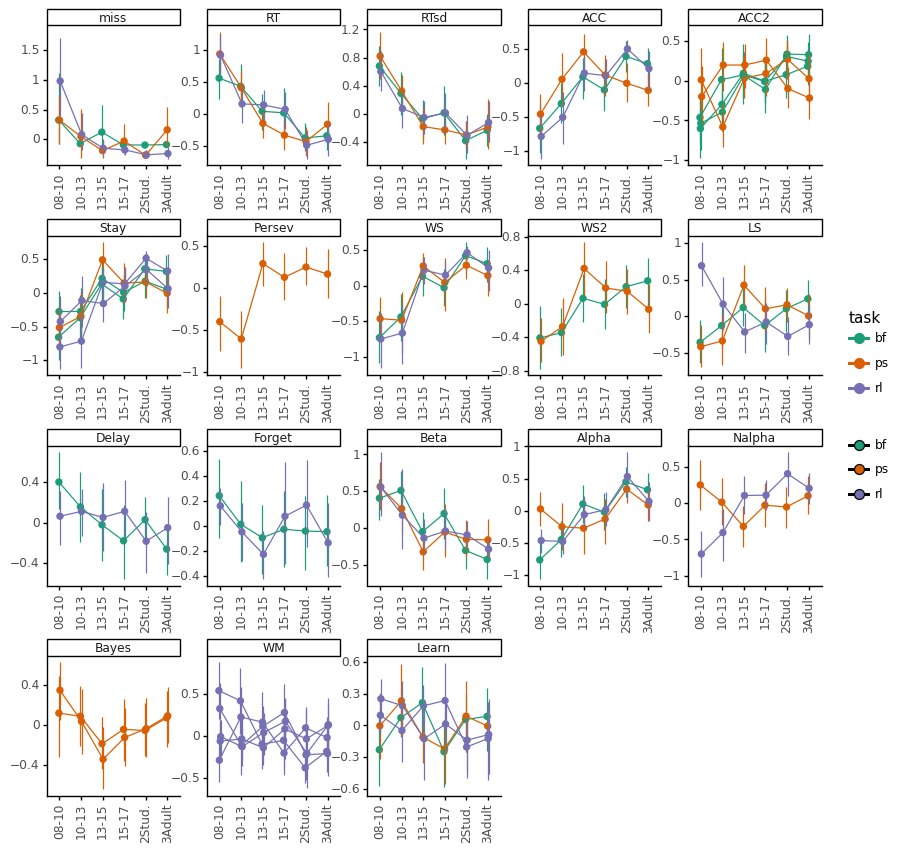

<ggplot: (112816007443)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_GroupedFeaturesOverAge_z.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 247 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 247 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_GroupedFeaturesOverAge_z.svg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine

In [12]:
# Feature groups over age
gg.options.figure_size = (10, 10)

# 'auto'       # Use loess if (n<1000), glm otherwise
# 'lm', 'ols'  # Linear Model
# 'wls'        # Weighted Linear Model
# 'rlm'        # Robust Linear Model
# 'glm'        # Generalized linear Model
# 'gls'        # Generalized Least Squares
# 'lowess'     # Locally Weighted Regression (simple)
# 'loess'      # Locally Weighted Regression
# 'mavg'       # Moving Average
# 'gpr'        # Gaussian Process Regressor

# Sort categories for panels
all_data_long_z['category'] = pd.Categorical(all_data_long_z['category']).reorder_categories(list(category_dict.keys()))
all_data_long['category'] = pd.Categorical(all_data_long['category']).reorder_categories(list(category_dict.keys()))

# Foundation for non-z-scored and z-scored version of the plot
group_base = (
    gg.ggplot(gg.aes('age_group_', 'value', group='feature', color='task', fill='task'))
    + gg.stat_summary(position=gg.position_dodge(width=0.1))  # fun_data='median_hilow', 
    + gg.stat_summary(geom='line', position=gg.position_dodge(width=0.1))  # fun_data='median_hilow', 
    + gg.labs(x='', y='', color='', fill='')
    + gg.scales.scale_color_brewer(type='qual', palette=2)
    + gg.scales.scale_fill_brewer(type='qual', palette=2)
#     + theme(axis.title.x=element_blank(),
#         axis.text.x=element_blank(),
#         axis.ticks.x=element_blank())
    + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
    + gg.theme(subplots_adjust={'hspace': 0.5, 'wspace': 0.2})
#     + gg.coord_cartesian(ylim=(0, 10))
    + gg.facet_wrap('~ category', scales='free')
)
cont_base = (
    gg.ggplot(gg.aes('PreciseYrs', 'value', group='feature', color='task', fill='task'))
#      + gg.stat_smooth(method='lm', formula='y ~ x + np.power(x, 2)')  #  + np.power(x, 3) + np.power(x, 4)
    + gg.geom_smooth()  # see above for options
    + gg.labs(y='', color='', fill='')
    + gg.theme(subplots_adjust={'hspace': 0.25, 'wspace': 0.2})
    + gg.facet_wrap('~ category', scales='free')
)

# Non-z-scored
group_g = group_base + gg.aes(color='task')
group_g.data = all_data_long
print(group_g)
group_g.save(os.path.join(plot_save_path, '1_GroupedFeaturesOverAge.png'))
group_g.save(os.path.join(plot_save_path, '1_GroupedFeaturesOverAge.svg'))

cont_g = cont_base + gg.aes(color='task')
cont_g.data = all_data_long
cont_g.save(os.path.join(plot_save_path, '1_GroupedFeaturesOverAgeGroup.png'))

# Z-scored
group_g_z = group_base + gg.aes(color='task')
group_g_z.data = all_data_long_z
print(group_g_z)
group_g_z.save(os.path.join(plot_save_path, '1_GroupedFeaturesOverAge_z.png'))
group_g_z.save(os.path.join(plot_save_path, '1_GroupedFeaturesOverAge_z.svg'))

cont_g_z = cont_base + gg.aes(color='task')
cont_g_z.data = all_data_long_z
cont_g_z.save(os.path.join(plot_save_path, '1_GroupedFeaturesOverAgeGroup_z.png'))

In [13]:
print(os.path.join(plot_save_path, '1_GroupedFeaturesOverAge_z.png'))

C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\1_GroupedFeaturesOverAge_z.png


## Correlation matrix

In [14]:
alpha_columns = [c for c in all_data.columns if 'alpha' in c]
beta_columns = [c for c in all_data.columns if 'beta' in c]
alpha_columns, beta_columns

(['bf_alpha',
  'bf_nalpha',
  'rl_log_alpha',
  'rl_log_nalpha',
  'ps_alpha',
  'ps_nalpha'],
 ['bf_1_over_beta', 'rl_epsilon_1_over_beta', 'ps_1_over_beta'])

-0.7348544453186466 3.3556998128827373e-43


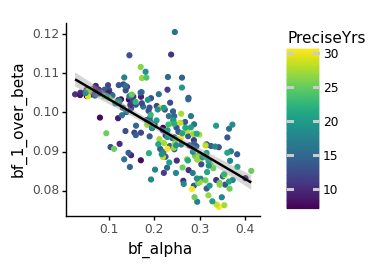

<ggplot: (112818830361)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S2_AlphaBetaCorrelations_bf_alpha.svg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_smooth.py:197: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


nan nan


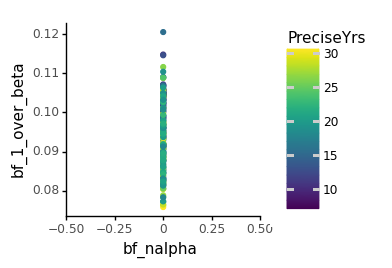

<ggplot: (112818101044)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S2_AlphaBetaCorrelations_bf_nalpha.svg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_smooth.py:197: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


0.09006269174337114 0.15820461123079094


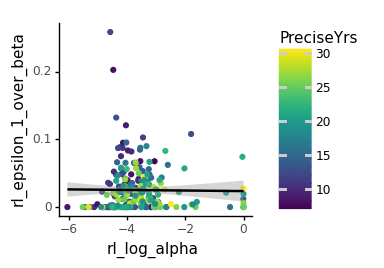

<ggplot: (112820712066)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S2_AlphaBetaCorrelations_rl_log_alpha.svg


-0.01151504919776898 0.8571045403049847


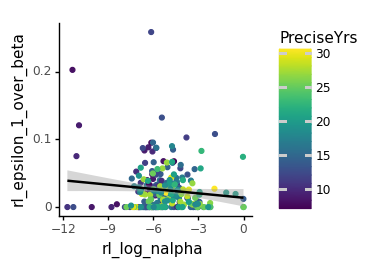

<ggplot: (112813275655)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S2_AlphaBetaCorrelations_rl_log_nalpha.svg


-0.3647539155945301 3.456813543481197e-09


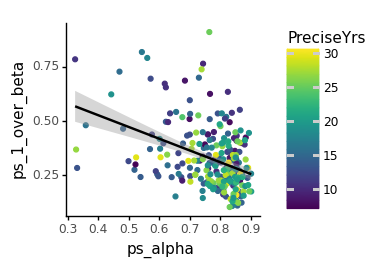

<ggplot: (112818833881)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S2_AlphaBetaCorrelations_ps_alpha.svg


0.2985232705925074 1.7771861171653263e-06


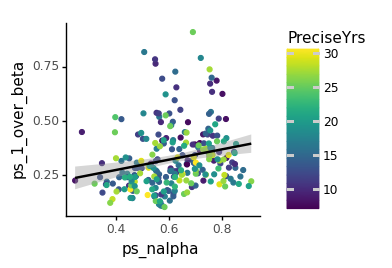

<ggplot: (112816299057)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S2_AlphaBetaCorrelations_ps_nalpha.svg


In [15]:
gg.options.figure_size = (2.5, 2.5)

for a_col in alpha_columns:
    
    b_col = beta_columns[np.argwhere([a_col[:2] == b_col[:2] for b_col in beta_columns])[0][0]]
    r, p = spearmanr(all_data[a_col], all_data[b_col])
#     text = "r={}\np={}".format(r.round(2), p.round(4))
#     label_x, label_y = np.mean(all_data[a_col]), np.max(all_data[b_col]) * 0.9
    
    g = (gg.ggplot(all_data, gg.aes(a_col, b_col, color='PreciseYrs'))
         + gg.geom_point()
         + gg.geom_smooth(method='lm')
#          + gg.geom_text(gg.aes(x=label_x, y=label_y), label=text, color='black')
        )
    print(r, p)
    print(g)
    g.save(os.path.join(plot_save_path, 'S2_AlphaBetaCorrelations_{}.svg'.format(a_col)))

In [16]:
alpha_columns = [c for c in all_data.columns if ('alpha' in c) and ('nalpha' not in c)]
nalpha_columns = [c for c in all_data.columns if 'nalpha' in c]
beta_columns = [c for c in all_data.columns if 'beta' in c]
list(itertools.combinations(alpha_columns, 2))

[('bf_alpha', 'rl_log_alpha'),
 ('bf_alpha', 'ps_alpha'),
 ('rl_log_alpha', 'ps_alpha')]

0.2083567755460558 0.000987017085893525


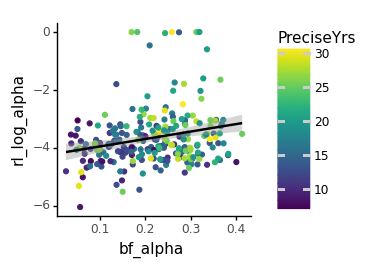

<ggplot: (112810814853)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S5_AlphaCorrelations_bf_alpha_rl_log_alpha.svg


0.16889933330572693 0.007810940683001201


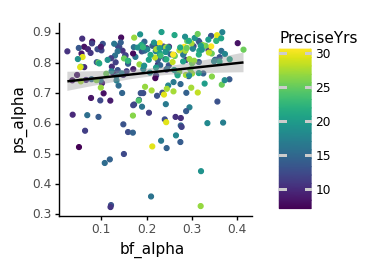

<ggplot: (112810442463)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S5_AlphaCorrelations_bf_alpha_ps_alpha.svg


-0.00571731180034248 0.9287643842083106


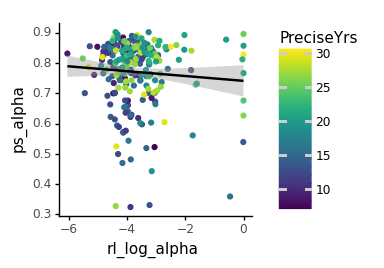

<ggplot: (112815218667)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S5_AlphaCorrelations_rl_log_alpha_ps_alpha.svg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_smooth.py:197: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


nan nan


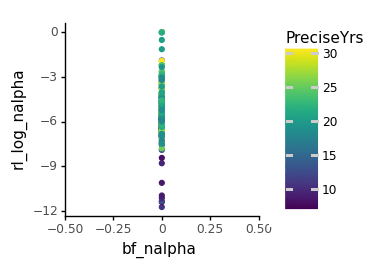

<ggplot: (112815413679)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S5_AlphaCorrelations_bf_nalpha_rl_log_nalpha.svg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_smooth.py:197: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_smooth.py:197: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message 

nan nan


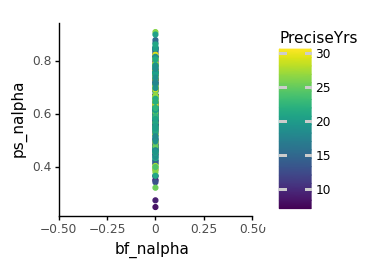

<ggplot: (112818284225)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S5_AlphaCorrelations_bf_nalpha_ps_nalpha.svg
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_smooth.py:197: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


-0.13544755794952487 0.033358449575959646


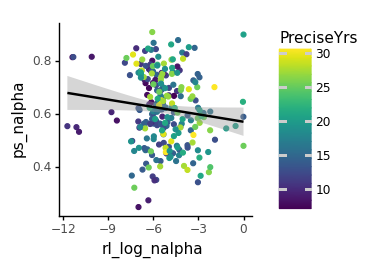

<ggplot: (112818251370)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S5_AlphaCorrelations_rl_log_nalpha_ps_nalpha.svg


0.15710954745697384 0.01343533826555714


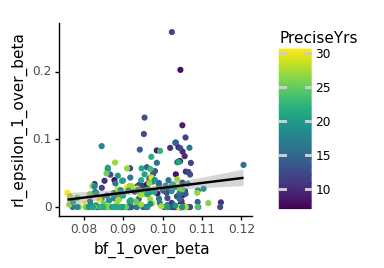

<ggplot: (112811269584)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S5_AlphaCorrelations_bf_1_over_beta_rl_epsilon_1_over_beta.svg


0.36088291599906985 5.189788035373499e-09


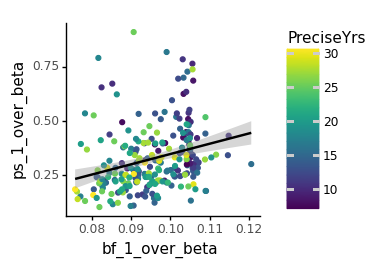

<ggplot: (112813266728)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S5_AlphaCorrelations_bf_1_over_beta_ps_1_over_beta.svg


0.04166600305156767 0.5145340152327287


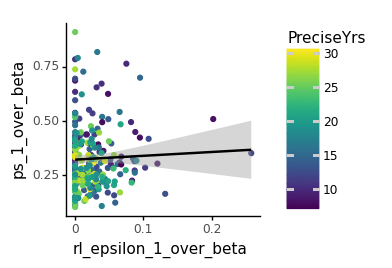

<ggplot: (112814876600)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2.5 x 2.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\S5_AlphaCorrelations_rl_epsilon_1_over_beta_ps_1_over_beta.svg


In [17]:
gg.options.figure_size = (2.5, 2.5)

for x_col, y_col in itertools.chain(
    itertools.combinations(alpha_columns, 2),
    itertools.combinations(nalpha_columns, 2),
    itertools.combinations(beta_columns, 2)
):
    
    r, p = spearmanr(all_data[x_col], all_data[y_col])
    
    g = (gg.ggplot(all_data, gg.aes(x_col, y_col, color='PreciseYrs'))
         + gg.geom_point()
         + gg.geom_smooth(method='lm')
        )
    print(r, p)
    print(g)
    g.save(os.path.join(plot_save_path, 'S5_AlphaCorrelations_{}_{}.svg'.format(x_col, y_col)))

## Stats: regression models

In [18]:
# for category in ['Alpha', 'Beta', 'Forget', 'Nalpha']:
    
#     sub_dat = all_data_long.loc[all_data_long['category'] == category]
#     print(np.unique(sub_dat['feature']))
    
#     task_mod = smf.mixedlm(
#         formula='value ~ task', groups=sub_dat['ID'], data=sub_dat
#     ).fit(reml=False)
    
#     no_task_mod = smf.mixedlm(
#         formula='value ~ 1', groups=sub_dat['ID'], data=sub_dat
#     ).fit(reml=False)

#     print(category)
#     if no_task_mod.aic > task_mod.aic:
#         print('Including task makes the AIC better (no task AIC: {}; task AIC: {})'.format(
#             no_task_mod.aic.round(2), task_mod.aic.round(2)))
        
#     else:
#         print('Including task does NOT make the AIC better (no task AIC: {}; task AIC: {})'.format(
#             no_task_mod.aic.round(2), task_mod.aic.round(2)))
#         print(no_task_mod.summary())
        
#     for combo in itertools.combinations(np.unique(sub_dat['feature']), 2):

#         print(combo)

#         subsub_dat = sub_dat.loc[sub_dat['feature'].isin(combo)]
#         subsub_dat['task'] = subsub_dat['task'].astype(str)  # To get rid of the third task in the model
#         task_mod = smf.mixedlm(
#             formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=subsub_dat['ID'],
#             data=subsub_dat
#         ).fit(reml=False)

#         print(task_mod.summary())

In [19]:
for category in ['Alpha', 'Beta', 'Forget', 'Nalpha']:
    
    sub_dat = all_data_long.loc[all_data_long['category'] == category]

    task_anova = AnovaRM(sub_dat, 'value', 'ID', ['task']).fit().summary()
    print(task_anova)
        
    for combo in itertools.combinations(np.unique(sub_dat['feature']), 2):

        print(combo)
        
        rel_dat = pd.merge(
            sub_dat.loc[sub_dat['feature'] == combo[0], ['ID', 'value']],
            sub_dat.loc[sub_dat['feature'] == combo[1], ['ID', 'value']],
            on='ID', suffixes=['0', '1']
        )
        rel_dat['param_diff'] = rel_dat['value0'] - rel_dat['value1']
        
        print('df: {}, t-test: {}'.format(
            rel_dat.shape[0]-1, ttest_1samp(rel_dat['param_diff'], popmean=0))
             )

                Anova
      F Value  Num DF  Den DF  Pr > F
-------------------------------------
task 2017.7409 2.0000 492.0000 0.0000

('bf_alpha', 'ps_alpha')
df: 246, t-test: Ttest_1sampResult(statistic=-65.7334551081543, pvalue=4.673898247239858e-158)
('bf_alpha', 'rl_log_alpha')
df: 246, t-test: Ttest_1sampResult(statistic=12.454778684301443, pvalue=6.18977006988456e-28)
('ps_alpha', 'rl_log_alpha')
df: 246, t-test: Ttest_1sampResult(statistic=51.01423902772331, pvalue=7.826916849525336e-133)
               Anova
     F Value  Num DF  Den DF  Pr > F
------------------------------------
task 829.7516 2.0000 492.0000 0.0000

('bf_1_over_beta', 'ps_1_over_beta')
df: 246, t-test: Ttest_1sampResult(statistic=-25.02744238449834, pvalue=1.431970737613891e-69)
('bf_1_over_beta', 'rl_epsilon_1_over_beta')
df: 246, t-test: Ttest_1sampResult(statistic=34.627661704529274, pvalue=1.4611566427021813e-96)
('ps_1_over_beta', 'rl_epsilon_1_over_beta')
df: 246, t-test: Ttest_1sampResult(statistic=

In [20]:
# for category in ['ACC', 'Delay', 'LS', 'WS', 'RT']:
    
#     sub_dat = all_data_long.loc[all_data_long['category'] == category]

#     print(gg.ggplot(sub_dat, gg.aes('task', 'value'))
#          + gg.stat_summary()
#         )
#     task_anova = AnovaRM(sub_dat, 'value', 'ID', ['task']).fit().summary()
#     print(task_anova)
        
#     for combo in itertools.combinations(np.unique(sub_dat['feature']), 2):

#         print(combo)
        
#         rel_dat = pd.merge(
#             sub_dat.loc[sub_dat['feature'] == combo[0], ['ID', 'value']],
#             sub_dat.loc[sub_dat['feature'] == combo[1], ['ID', 'value']],
#             on='ID', suffixes=['0', '1']
#         )
#         rel_dat['param_diff'] = rel_dat['value0'] - rel_dat['value1']
        
#         print('df: {}, t-test: {}'.format(
#             rel_dat.shape[0]-1, ttest_1samp(rel_dat['param_diff'], popmean=0))
#              )

In [21]:
# sub_dat = all_data_long_z.loc[all_data_long_z['feature'] == 'bf_alpha']

# print(np.unique(sub_dat['feature']))

# smf.mixedlm(
#     formula='value ~ (PreciseYrs + np.square(PreciseYrs))', groups=sub_dat['ID'], data=sub_dat
# ).fit(reml=False).summary()

In [22]:
# sub_dat = all_data_long_z.loc[all_data_long_z['feature'].isin(['ps_1_over_beta', 'bf_1_over_beta'])]
# print(np.unique(sub_dat['feature']))

# task_mod = smf.mixedlm(
#     formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=sub_dat['ID'], data=sub_dat
# ).fit(reml=False)

# no_task_mod = smf.mixedlm(
#     formula='value ~ (PreciseYrs + np.square(PreciseYrs))', groups=sub_dat['ID'], data=sub_dat
# ).fit(reml=False)

# if no_task_mod.aic > task_mod.aic:
#     print('Including task makes the AIC better (no task AIC: {}; task AIC: {})'.format(
#         no_task_mod.aic.round(2), task_mod.aic.round(2)))

# else:
#     print('Including task does NOT make the AIC better (no task AIC: {}; task AIC: {})'.format(
#         no_task_mod.aic.round(2), task_mod.aic.round(2)))

In [23]:
for category in ['Alpha', 'Beta', 'Forget', 'Nalpha']:
    
    sub_dat = all_data_long_z.loc[all_data_long_z['category'] == category]
    n_subj = len(np.unique(sub_dat['ID']))
    print(np.unique(sub_dat['feature']))
    
    task_mod = smf.mixedlm(
        formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=sub_dat['ID'], data=sub_dat
    ).fit(reml=False)
    
    no_task_mod = smf.mixedlm(
        formula='value ~ (PreciseYrs + np.square(PreciseYrs))', groups=sub_dat['ID'], data=sub_dat
    ).fit(reml=False)
    
    print(category)
    if no_task_mod.aic > task_mod.aic:
        
        # Calculate F-stats
        ## Residual sums of squares
        RSS_task = np.sum(task_mod.resid * task_mod.resid)
        RSS_no_task = np.sum(no_task_mod.resid * no_task_mod.resid)
        RSS_diff = RSS_no_task - RSS_task

        df_task = n_subj - len(['PreciseYrs', 'PreciseYrs_squared']) * len(np.unique(sub_dat['task']))
        df_no_task = n_subj - len(['PreciseYrs', 'PreciseYrs_squared'])
        print(len(['PreciseYrs', 'PreciseYrs_squared']) * len(np.unique(sub_dat['task'])), len(['PreciseYrs', 'PreciseYrs_squared']))
        df_diff = df_no_task - df_task

        MS_task = RSS_task / df_task
        MS_diff = RSS_diff / df_diff

        F = MS_diff / MS_task

        p = 1 - f.cdf(F, df_diff, df_no_task)

        # APA reporting F-test: "R2 = .12, F(1, 225) = 42.64, p < .001"
        print('Including task makes the AIC better (no task AIC: {}; task AIC: {}; F({},{})={}, p: {})'.format(
            no_task_mod.aic.round(2), task_mod.aic.round(2), df_diff, df_no_task, F.round(2), p.round(5)))
        
    else:
        print('Including task does NOT make the AIC better (no task AIC: {}; task AIC: {})'.format(
            no_task_mod.aic.round(2), task_mod.aic.round(2)))
    
    print(no_task_mod.summary())
        
#     for combo in itertools.combinations(np.unique(sub_dat['feature']), 2):

#         print(combo)

#         subsub_dat = sub_dat.loc[sub_dat['feature'].isin(combo)]
#         subsub_dat['task'] = subsub_dat['task'].astype(str)  # To get rid of the third task in the model
#         task_mod = smf.mixedlm(
#             formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=subsub_dat['ID'],
#             data=subsub_dat
#         ).fit(reml=False)

#         print(task_mod.summary())

['bf_alpha' 'ps_alpha' 'rl_log_alpha']
Alpha
6 2
Including task makes the AIC better (no task AIC: 2044.21; task AIC: 2041.97; F(4,245)=2.34, p: 0.05589)
             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   value     
No. Observations:     741       Method:               ML        
No. Groups:           247       Scale:                0.8980    
Min. group size:      3         Log-Likelihood:       -1017.1068
Max. group size:      3         Converged:            Yes       
Mean group size:      3.0                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             -2.103    0.361 -5.826 0.000 -2.810 -1.395
PreciseYrs             0.202    0.041  4.932 0.000  0.122  0.282
np.square(PreciseYrs) -0.004    0.001 -3.927 0.000 -0.006 -0.002
Group Var      

IndexError: index 494 is out of bounds for axis 0 with size 494

In [24]:
for category in ['ACC', 'Delay', 'LS', 'WS', 'RT']:
    
    sub_dat = all_data_long_z.loc[all_data_long_z['category'] == category]
    print(np.unique(sub_dat['feature']))
    
    task_mod = smf.mixedlm(
        formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=sub_dat['ID'], data=sub_dat
    ).fit(reml=False)
    
    no_task_mod = smf.mixedlm(
        formula='value ~ (PreciseYrs + np.square(PreciseYrs))', groups=sub_dat['ID'], data=sub_dat
    ).fit(reml=False)

    print(category)
    if no_task_mod.aic > task_mod.aic:
        print('Including task makes the AIC better (no task AIC: {}; task AIC: {})'.format(
            no_task_mod.aic.round(2), task_mod.aic.round(2)))
        
    else:
        print('Including task does NOT make the AIC better (no task AIC: {}; task AIC: {})'.format(
            no_task_mod.aic.round(2), task_mod.aic.round(2)))
        print(no_task_mod.summary())
        
    for combo in itertools.combinations(np.unique(sub_dat['feature']), 2):

        print(combo)

        subsub_dat = sub_dat.loc[sub_dat['feature'].isin(combo)]
        subsub_dat['task'] = subsub_dat['task'].astype(str)  # To get rid of the third task in the model
        task_mod = smf.mixedlm(
            formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=subsub_dat['ID'],
            data=subsub_dat
        ).fit(reml=False)

        print(task_mod.summary())

['bf_ACC' 'ps_ACC' 'rl_ACC']
ACC
Including task makes the AIC better (no task AIC: 2024.0; task AIC: 2014.96)
('bf_ACC', 'ps_ACC')


<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.8144   
Min. group size:          2             Log-Likelihood:           -678.0526
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -2.793    0.618 -4.521 0.000 -4.003 -1.582
task[T.ps]                        1.270    0.823  1.543 0.123 -0.344  2.883
PreciseYrs                        0.273    0.070  3.896 0.000  0.135  0.410
PreciseYrs:task[T.ps]          

<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.5588   
Min. group size:          2             Log-Likelihood:           -642.5628
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -2.793    0.590 -4.732 0.000 -3.949 -1.636
task[T.rl]                       -0.883    0.682 -1.295 0.195 -2.220  0.453
PreciseYrs                        0.273    0.067  4.079 0.000  0.142  0.404
PreciseYrs:task[T.rl]          

<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.8554   
Min. group size:          2             Log-Likelihood:           -672.7062
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -1.523    0.609 -2.499 0.012 -2.717 -0.328
task[T.rl]                       -2.153    0.844 -2.552 0.011 -3.807 -0.499
PreciseYrs                        0.174    0.069  2.524 0.012  0.039  0.310
PreciseYrs:task[T.rl]          

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


Delay
Including task does NOT make the AIC better (no task AIC: 1401.74; task AIC: 1405.29)
             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    value    
No. Observations:    494        Method:                ML       
No. Groups:          247        Scale:                 0.9796   
Min. group size:     2          Log-Likelihood:        -695.8692
Max. group size:     2          Converged:             Yes      
Mean group size:     2.0                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.953    0.451  2.111 0.035  0.068  1.838
PreciseYrs            -0.092    0.051 -1.806 0.071 -0.193  0.008
np.square(PreciseYrs)  0.002    0.001  1.459 0.144 -0.001  0.005
Group Var              0.000    0.071                           

('bf_delay'

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.9748   
Min. group size:          2             Log-Likelihood:           -694.6473
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         1.334    0.637  2.094 0.036  0.085  2.582
task[T.rl]                       -0.761    0.901 -0.845 0.398 -2.526  1.004
PreciseYrs                       -0.125    0.072 -1.734 0.083 -0.266  0.016
PreciseYrs:task[T.rl]          

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


LS
Including task makes the AIC better (no task AIC: 2109.24; task AIC: 2074.54)
('bf_LS', 'ps_LS')
                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.6101   
Min. group size:          2             Log-Likelihood:           -673.0867
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -0.929    0.632 -1.470 0.142 -2.167  0.309
task[T.ps]                       -0.902    0.712 -1.266 0.205 -2.299  0.494
Precise

<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.9176   
Min. group size:          2             Log-Likelihood:           -681.2007
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -0.929    0.620 -1.499 0.134 -2.143  0.286
task[T.rl]                        3.941    0.874  4.510 0.000  2.228  5.653
PreciseYrs                        0.075    0.070  1.072 0.284 -0.062  0.213
PreciseYrs:task[T.rl]          

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.9139   
Min. group size:          2             Log-Likelihood:           -681.6516
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -1.831    0.620 -2.952 0.003 -3.047 -0.615
task[T.rl]                        4.843    0.872  5.554 0.000  3.134  6.552
PreciseYrs                        0.195    0.070  2.780 0.005  0.058  0.333
PreciseYrs:task[T.rl]          

<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.6556   
Min. group size:          2             Log-Likelihood:           -660.0191
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -3.319    0.603 -5.500 0.000 -4.502 -2.136
task[T.ps]                        1.376    0.739  1.863 0.063 -0.072  2.823
PreciseYrs                        0.329    0.068  4.807 0.000  0.195  0.463
PreciseYrs:task[T.ps]          

<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.5110   
Min. group size:          2             Log-Likelihood:           -630.0584
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -3.319    0.579 -5.730 0.000 -4.455 -2.184
task[T.rl]                       -0.567    0.652 -0.869 0.385 -1.845  0.712
PreciseYrs                        0.329    0.066  5.008 0.000  0.200  0.457
PreciseYrs:task[T.rl]          

<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.7474   
Min. group size:          2             Log-Likelihood:           -661.9256
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        -1.944    0.599 -3.247 0.001 -3.117 -0.770
task[T.rl]                       -1.942    0.789 -2.463 0.014 -3.488 -0.397
PreciseYrs                        0.189    0.068  2.792 0.005  0.056  0.322
PreciseYrs:task[T.rl]          

<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.5885   
Min. group size:          2             Log-Likelihood:           -641.2156
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         2.404    0.583  4.120 0.000  1.260  3.547
task[T.ps]                        2.154    0.700  3.077 0.002  0.782  3.525
PreciseYrs                       -0.227    0.066 -3.438 0.001 -0.357 -0.098
PreciseYrs:task[T.ps]          

<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.4397   
Min. group size:          2             Log-Likelihood:           -622.7259
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         2.404    0.585  4.107 0.000  1.257  3.551
task[T.rl]                        1.397    0.605  2.309 0.021  0.211  2.582
PreciseYrs                       -0.227    0.066 -3.427 0.001 -0.357 -0.097
PreciseYrs:task[T.rl]          

<ipython-input-24-cff21b88f762>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       value    
No. Observations:         494           Method:                   ML       
No. Groups:               247           Scale:                    0.4792   
Min. group size:          2             Log-Likelihood:           -616.1446
Max. group size:          2             Converged:                Yes      
Mean group size:          2.0                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         4.557    0.564  8.080 0.000  3.452  5.663
task[T.rl]                       -0.757    0.631 -1.198 0.231 -1.994  0.481
PreciseYrs                       -0.482    0.064 -7.537 0.000 -0.607 -0.356
PreciseYrs:task[T.rl]          

In [25]:
sub_dat = all_data_long_z.loc[
    (all_data_long_z['category'] == 'LS') & (all_data_long_z['task'] == 'ps')
]
print(np.unique(sub_dat['feature']))

task_mod = smf.mixedlm(
    formula='value ~ (PreciseYrs + np.square(PreciseYrs))', groups=sub_dat['ID'], data=sub_dat
).fit(reml=False)
task_mod.summary()

['ps_LS']


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2170: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt


<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:                MixedLM    Dependent Variable:    value    
No. Observations:     247        Method:                ML       
No. Groups:           247        Scale:                 0.4796   
Min. group size:      1          Log-Likelihood:        -345.3288
Max. group size:      1          Converged:             Yes      
Mean group size:      1.0                                        
-----------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept             -1.831    0.176 -10.403 0.000 -2.176 -1.486
PreciseYrs             0.195    0.009  22.921 0.000  0.179  0.212
np.square(PreciseYrs) -0.005    0.000 -77.963 0.000 -0.005 -0.005
Group Var              0.480                                     
=================================================================

"""

# OLD

In [ ]:
[f for f in np.unique(all_data_long_z.feature) if 'delay' in f]

In [ ]:
all_data_long_z['task'] = pd.Categorical(all_data_long_z['task'], categories=['ps', 'bf', 'rl', ])  # Make ps the reference category

In [ ]:
category = 'Alpha'
# features = ['rl_lrn_delay_sig', 'bf_delay'] # ['rl_forget', 'bf_forget']  # ['ps_WS', 'bf_WS', 'rl_WS']  # ['ps_RT', 'bf_RT', 'rl_RT']

sub_dat = all_data_long_z.loc[all_data_long_z['category'] == category]
# sub_dat = all_data_long_z.loc[all_data_long_z['feature'].isin(features)]
# mod = smf.ols(formula='value ~ task * (PreciseYrs + np.square(PreciseYrs))', data=sub_dat)
# mod = smf.ols(formula='value ~ (C(task) - 1) + (PreciseYrs + np.square(PreciseYrs)) + (C(task) - 1) : (PreciseYrs + np.square(PreciseYrs))', data=sub_dat)
# mod = smf.mixedlm(formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=sub_dat['task'], data=sub_dat)
mod = smf.mixedlm(formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=sub_dat['ID'], data=sub_dat)
# mod = smf.mixedlm(
#     formula='value ~ task * (PreciseYrs + np.square(PreciseYrs))',
#     groups=sub_dat['ID'],
#     vc_formula={'task': '0 + C(task)'},
#     data=sub_dat)
res = mod.fit(reml=False)
print(res.summary())
print(res.aic)

In [ ]:
category = 'Alpha'
# features = ['rl_lrn_delay_sig', 'bf_delay'] # ['rl_forget', 'bf_forget']  # ['ps_WS', 'bf_WS', 'rl_WS']  # ['ps_RT', 'bf_RT', 'rl_RT']

sub_dat = all_data_long_z.loc[all_data_long_z['category'] == category]
# sub_dat = all_data_long_z.loc[all_data_long_z['feature'].isin(features)]
mod = smf.mixedlm(formula='value ~ (PreciseYrs + np.square(PreciseYrs))', groups=sub_dat['ID'], data=sub_dat)
res = mod.fit(reml=False)
print(res.summary())
print(res.aic)

In [ ]:
category = 'Nalpha'
tasks = ['ps',]  # ['rl',]  # ['bf', 'rl']  # 

sub_dat = all_data_long_z.loc[(all_data_long_z['category'] == category) & (all_data_long_z['task'].isin(tasks))]
mod = smf.mixedlm(formula='value ~ (PreciseYrs + np.square(PreciseYrs))', groups=sub_dat['ID'], data=sub_dat)
print(mod.fit().summary())

In [ ]:
all_data_long['task'] = pd.Categorical(all_data_long['task'], categories=['ps', 'rl', 'bf', ])  # Make ps the reference category

In [ ]:
category = 'Nalpha'
# features = ['rl_lrn_delay_sig', 'bf_delay'] # ['rl_forget', 'bf_forget']  # ['ps_WS', 'bf_WS', 'rl_WS']  # ['ps_RT', 'bf_RT', 'rl_RT']

sub_dat = all_data_long.loc[all_data_long['category'] == category]
# sub_dat = all_data_long_z.loc[all_data_long_z['feature'].isin(features)]
# mod = smf.ols(formula='value ~ task * (PreciseYrs + np.square(PreciseYrs))', data=sub_dat)
# mod = smf.ols(formula='value ~ (C(task) - 1) + (PreciseYrs + np.square(PreciseYrs)) + (C(task) - 1) : (PreciseYrs + np.square(PreciseYrs))', data=sub_dat)
mod = smf.mixedlm(formula='value ~ (PreciseYrs + np.square(PreciseYrs)) * task', groups=sub_dat['task'], data=sub_dat)
# mod = smf.mixedlm(
#     formula='value ~ task * (PreciseYrs + np.square(PreciseYrs))',
#     groups=sub_dat['ID'],
#     vc_formula={'task': '0 + C(task)'},
#     data=sub_dat)
res = mod.fit()
print(res.summary())

In [ ]:
np.mean((all_data_long.loc[all_data_long['feature'] == 'bf_1_over_beta', 'value']))

In [ ]:
dat = all_data_long.loc[all_data_long.feature.isin(['ps_ACC', 'bf_ACC'])]
dat

In [ ]:
(gg.ggplot(dat, gg.aes('age_group_', 'value'))
#  + gg.geom_point()
#  + gg.geom_smooth(method='mavg')
 + gg.stat_summary()
 + gg.facet_grid('~ feature')
)

In [ ]:
# Specific groups of features over age
feature_sets = [
    ['bf_RT', 'ps_RT', 'rl_RT'],
    ['bf_ACC', 'ps_ACC', 'rl_ACC'],
#     ['bf_ACC_delta', 'ps_ACC_delta', 'rl_ACC_delta'],
#     ['bf_RT_delta', 'ps_RT_delta', 'rl_RT_delta'],
    ['bf_1_over_beta', 'ps_1_over_beta', 'rl_epsilon_1_over_beta'],
    ['bf_alpha', 'ps_alpha', 'rl_log_alpha'],
    ['bf_nalpha', 'ps_nalpha', 'rl_log_nalpha'],
#     ['bf_forget', 'rl_forget'],
]

gg.options.figure_size = (1.5, 1.5)
for features in feature_sets:
    g_rt = g + gg.labs(x='')
    g_rt.data = all_data_long.loc[all_data_long.feature.isin(features)]
    print(g_rt)

    gg.options.figure_size = (1.5, 1.5)
    gz_rt = g_z + gg.labs(x='')
    gz_rt.data = all_data_long_z.loc[all_data_long.feature.isin(features)]
    print(gz_rt)

In [ ]:
g_PDS = g_age + gg.aes('PDS')
g_PDS.save(os.path.join(plot_save_path, '1_FeaturesOverPDS.png'))
print(g_PDS)

g_T = g_age + gg.aes('meanT')
g_T.save(os.path.join(plot_save_path, '1_FeaturesOverT.png'))
print(g_T)

In [ ]:
# PDS and Testosterone groups
g_PDS_group = g_age + gg.aes('PDS_group_')
g_PDS_group.save(os.path.join(plot_save_path, '1_FeaturesOverPDSGroup.png'))
print(g_PDS_group)

g_T_group = g_age + gg.aes('T_group_')
g_T_group.save(os.path.join(plot_save_path, '1_FeaturesOverTGroup.png'))
print(g_T_group)